<a href="https://colab.research.google.com/github/sauravakolia/OSIC-Pulmonary-/blob/master/EDA(OSIC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reload_ext autoreload
%autoreload 2         
%matplotlib inline

In [2]:
!pip install fastai --upgrade

     |████████████████████████████████| 194kB 2.5MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [3]:
!pip install pydicom 
!pip install kornia 

     |████████████████████████████████| 35.5MB 100kB/s 
     |████████████████████████████████| 204kB 1.7MB/s 


In [4]:
################################################################################
# INSTALL CONDA ON GOOGLE COLAB
################################################################################
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2020-10-12 08:37:37--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   130MB/s    in 0.6s    

2020-10-12 08:37:38 (130 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [5]:
!conda install -c conda-forge pillow -y
!conda install -c conda-forge pydicom -y
!conda install gdcm -c conda-forge -y 
!pip install pylibjpeg pylibjpeg-libjpeg

Solving environment: | / - \ | / - \ | / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.5

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pillow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py37he5f6b98_2         151 KB  conda-forge
    conda-4.8.5                |   py37he5f6b98_2         3.0 MB  conda-forge
    freetype-2.10.3            |       he06d7ca_0         920 KB  conda-forge
    jpeg-9d                    |       h516909a_0         266 KB  conda-forge
    lcms2-2.11                 |       hbd6801e_0         431 KB  conda-forge
    libpng-1

In [6]:

%mkdir 'OSIC'

In [7]:
%cd "OSIC"

/content/OSIC


In [8]:
!wget --header 'Host: storage.googleapis.com' --user-agent 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:81.0) Gecko/20100101 Firefox/81.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://www.kaggle.com/' --header 'Upgrade-Insecure-Requests: 1' 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/20604/1357052/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1602749703&Signature=UsL44rcfBSYKZ%2Fp3B7DFehOhpXbP28KftiSPhxbqpYNU%2BTZ0fXc5l09wU6vf8C4ZreFt1TxxyLrxxlKk3%2F5Wc%2F9JCUGhV2sHdRJUOdubXvX%2BiZbpC9dRnRNK%2B%2FwNAqXMVt0p72wVna6Q2MMc1JDq%2F1DVbEHhMyI3r4Vgjzbvvtx7kd%2BFcduIxB8ZlrOggJPGsvYave6p%2B4KUQ7yra7LgizlCpT5tKDWTvC0qH2q4I5pYxfHEFYiwPdU1IGe%2BOuLMVGBraigt3UyjALNNAjBx%2BtJu3pYctIsMeZfDlfDx1uk0qicHqWeVlTZJwIgKw7zNz5pbmRytvFPkAKuoM9ro0A%3D%3D&response-content-disposition=attachment%3B+filename%3Dosic-pulmonary-fibrosis-progression.zip' --output-document 'osic-pulmonary-fibrosis-progression.zip'

--2020-10-12 08:38:46--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/20604/1357052/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1602749703&Signature=UsL44rcfBSYKZ%2Fp3B7DFehOhpXbP28KftiSPhxbqpYNU%2BTZ0fXc5l09wU6vf8C4ZreFt1TxxyLrxxlKk3%2F5Wc%2F9JCUGhV2sHdRJUOdubXvX%2BiZbpC9dRnRNK%2B%2FwNAqXMVt0p72wVna6Q2MMc1JDq%2F1DVbEHhMyI3r4Vgjzbvvtx7kd%2BFcduIxB8ZlrOggJPGsvYave6p%2B4KUQ7yra7LgizlCpT5tKDWTvC0qH2q4I5pYxfHEFYiwPdU1IGe%2BOuLMVGBraigt3UyjALNNAjBx%2BtJu3pYctIsMeZfDlfDx1uk0qicHqWeVlTZJwIgKw7zNz5pbmRytvFPkAKuoM9ro0A%3D%3D&response-content-disposition=attachment%3B+filename%3Dosic-pulmonary-fibrosis-progression.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 173.194.216.128, 173.194.217.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14332865109 (13G) [application/zip]
Saving to: ‘os

In [9]:
import os
import zipfile

local_zip = '/content/OSIC/osic-pulmonary-fibrosis-progression.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()


In [10]:
!rm /content/OSIC/osic-pulmonary-fibrosis-progression.zip

In [11]:
from fastai.basics           import *
from fastai.medical.imaging  import *
import numpy as np 
import pandas as pd 
import pydicom as dcm
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns 
p = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

3


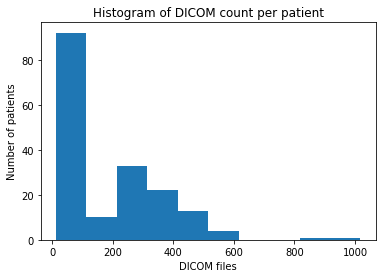

In [12]:
patient_sizes = [len(os.listdir('/content/OSIC/train/' + d)) for d in os.listdir('/content/OSIC/train/')]

count=0
for x in patient_sizes:
  if x >600:
    count+=1
print(count)
plt.hist(patient_sizes)
plt.ylabel('Number of patients')
plt.xlabel('DICOM files')
plt.title('Histogram of DICOM count per patient');

**Train data**

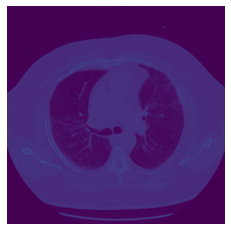

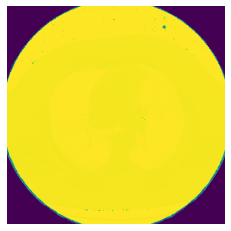

In [13]:
r = dcm.dcmread('/content/OSIC/train/ID00105637202208831864134/20.dcm')
img = r.pixel_array
img[img == -2000] = 0

plt.axis('off')
plt.imshow(img)
plt.show()

plt.axis('off')
plt.imshow(-img) # Invert colors with -
plt.show()

In [14]:
dataset = dcm.dcmread('train/ID00105637202208831864134/2.dcm')

In [15]:
dataset

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.0.37492.1591423399.183667
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.1
(0002, 0013) Implementation Version Name         SH: 'OSIRIX_361'
(0002, 0016) Source Application Entity Title     AE: 'ANONYMOUS'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY', 'REFORMATTED', 'AVERAGE']
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.0.37492.1591423399.183667
(0008, 0060) Modality                    

(array([2.65227e+05, 4.24900e+03, 3.84100e+03, 1.60335e+05, 1.43100e+05,
        9.97600e+03, 2.09100e+03, 8.15000e+02, 1.53000e+02, 3.70000e+01]),
 array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250., 2500.], dtype=float32),
 <a list of 10 Patch objects>)

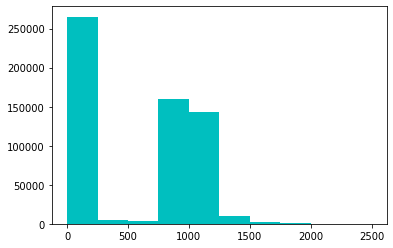

In [16]:
px = dataset.pixels.flatten()
plt.hist(px, color='c')

In [17]:
tensor_dicom = pixels(dataset) #convert into tensor

print(f'RescaleIntercept: {dataset.RescaleIntercept:1f}\nRescaleSlope: {dataset.RescaleSlope:1f}\nMax pixel: '
      f'{tensor_dicom.max()}\nMin pixel: {tensor_dicom.min()}\nShape: {tensor_dicom.shape}')


RescaleIntercept: -1024.000000
RescaleSlope: 1.000000
Max pixel: 2500.0
Min pixel: 0.0
Shape: torch.Size([768, 768])


(array([2.65227e+05, 4.24900e+03, 3.84100e+03, 1.60335e+05, 1.43100e+05,
        9.97600e+03, 2.09100e+03, 8.15000e+02, 1.53000e+02, 3.70000e+01]),
 array([-1024.,  -774.,  -524.,  -274.,   -24.,   226.,   476.,   726.,
          976.,  1226.,  1476.], dtype=float32),
 <a list of 10 Patch objects>)

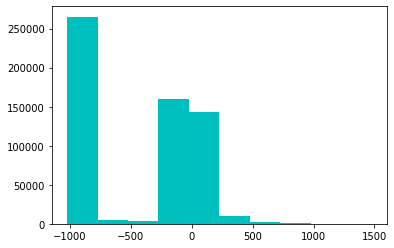

In [18]:
tensor_dicom_scaled = scaled_px(dataset) #convert into tensor taking RescaleIntercept and RescaleSlope into consideration
plt.hist(tensor_dicom_scaled.flatten(), color='c')


In [19]:
print(f'Max pixel: {tensor_dicom_scaled.max()}\nMin pixel: {tensor_dicom_scaled.min()}')


Max pixel: 1476.0
Min pixel: -1024.0


Looking at various densities

Looking at the bones +300 HUs



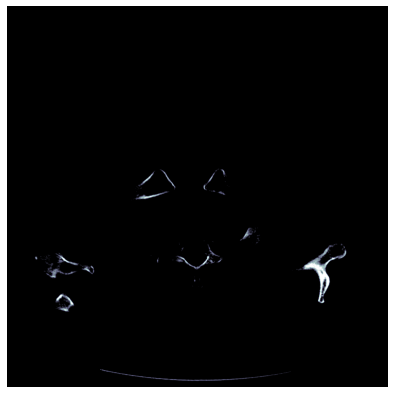

In [20]:
dataset.show(max_px=None, min_px=300, figsize=(7,7))


Looking at the water based areas 0 HUs



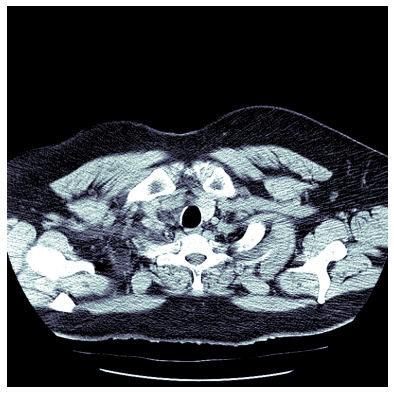

In [21]:
dataset.show(max_px=100, min_px=-100, figsize=(7,7))


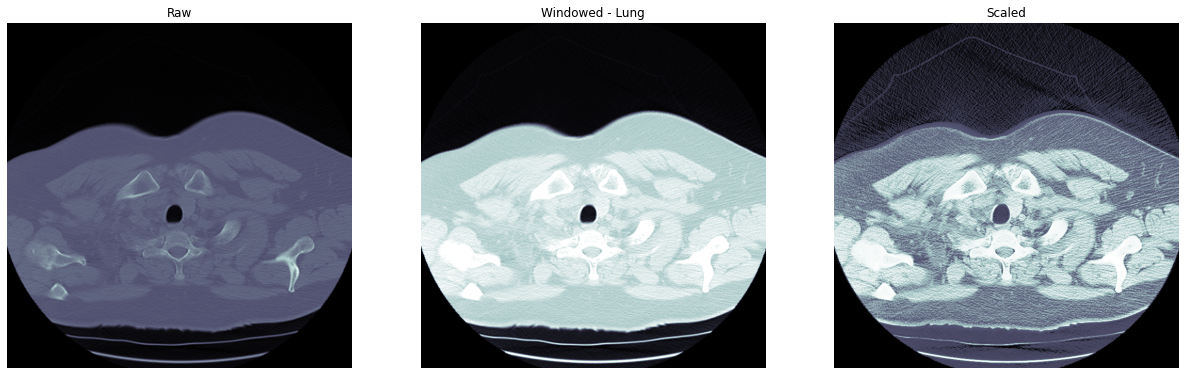

In [22]:
scales = False, dicom_windows.lungs, True
titles = 'Raw','Windowed - Lung', 'Scaled'

for s,a,t in zip(scales, subplots(1,3,imsize=7)[1].flat, titles):
    dataset.show(scale=s, ax=a, title=t)

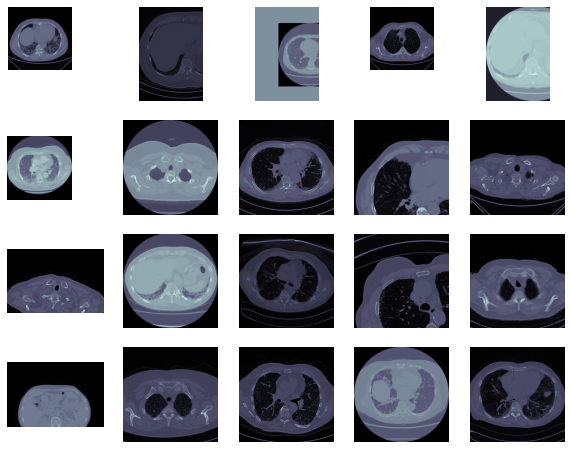

In [23]:
files = glob.glob('train/*/*.dcm')
def dicom_to_image(filename):
    im = dcm.dcmread(filename)
    img = im.pixel_array
    img[img == -2000] = 0
    return img
f, plots = plt.subplots(4, 5, sharex='col', sharey='row', figsize=(10, 8))
for i in range(20):
    plots[i // 5, i % 5].axis('off')
    plots[i // 5, i % 5].imshow(dicom_to_image(np.random.choice(files)), cmap=plt.cm.bone)

*ALL DICCOM Images of a patient*

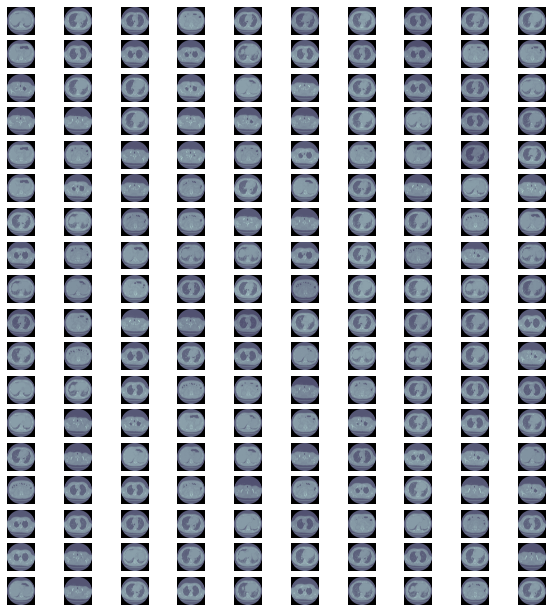

In [24]:
f, plots = plt.subplots(18, 10, sharex='all', sharey='all', figsize=(10, 11))
pat = glob.glob('train/ID00422637202311677017371/*.dcm')
for i in range(180):
    plots[i // 10, i % 10].axis('off')
    plots[i // 10, i % 10].imshow(dcm.dcmread(pat[i]).pixel_array, cmap=plt.cm.bone)

This patient in particular has 423 slices (which is quite a lot) and we have indexed on only a few of these samples. All of this patient's slices are circular.

USING fastai.medical

Now We use "systematic windowing" which was previously used by radiologists with regards to the brain and fastai provide various windowing techniques.

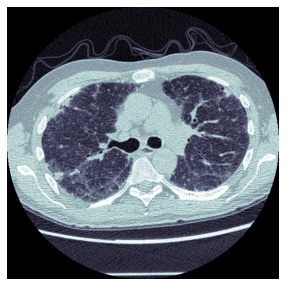

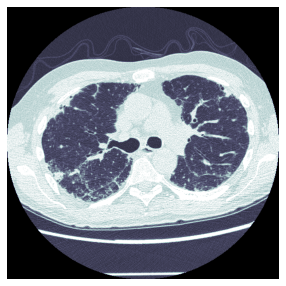

In [25]:
fn = Path('train/ID00007637202177411956430/')
fname = Path('train/ID00007637202177411956430/13.dcm')
dcom = fname.dcmread()
dcom.show()
dcom.show(scale=dicom_windows.lungs)

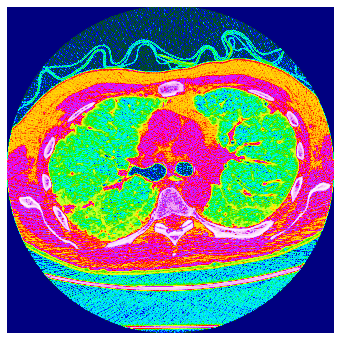

In [26]:
dcom.show(cmap=plt.cm.gist_ncar, figsize=(6,6))

The turbo colormap exposes the amount of empty space that we have in the image.

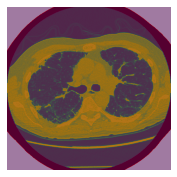

In [27]:
mask = dcom.mask_from_blur(dicom_windows.lungs)
wind = dcom.windowed(*dicom_windows.lungs)


_,ax = subplots(1,1)
show_image(wind, ax=ax[0])
show_image(mask, alpha=0.5, cmap=plt.cm.Reds, ax=ax[0]);

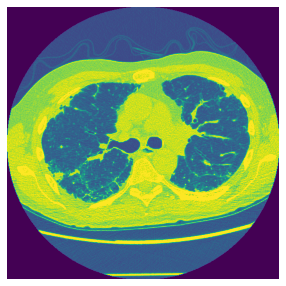

In [28]:
bbs = mask2bbox(mask)
lo,hi = bbs
show_image(wind[lo[0]:hi[0],lo[1]:hi[1]]);

Now we can isolate the lungs from the empty space.


In [29]:
path = Path('train/ID00007637202177411956430/')
def fix_pxrepr(dcm):
    if dcm.PixelRepresentation != 0 or dcm.RescaleIntercept<-100: return
    x = dcm.pixel_array + 1000
    px_mode = 4096
    x[x>=px_mode] = x[x>=px_mode] - px_mode
    dcm.PixelData = x.tobytes()
    dcm.RescaleIntercept = -1000



The above basically just fixes up the pixel representation attribute of the DICOM file for us to use.


In [30]:
def dcm_tfm(fn): 
    fn = (path/fn).with_suffix('.dcm')
    try:
        x = fn.dcmread()
        fix_pxrepr(x)
    except Exception as e:
        pass
    if x.Rows != 512 or x.Columns != 512: x.zoom_to((512,512))
    px = x.scaled_px
    return TensorImage(px.to_3chan(dicom_windows.lungs,dicom_windows.subdural, bins=None))

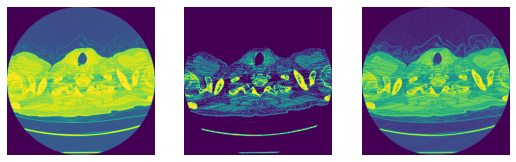

In [31]:
show_images(dcm_tfm('2'))



The above is basically just our earlier image in Tensor format for a neural network to utilize.


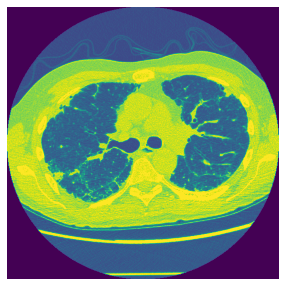

In [32]:
px = dcom.windowed(*dicom_windows.lungs)
show_image(px);

**This** crops out the above neatly to leave just the lungs remaining right where we want them. However

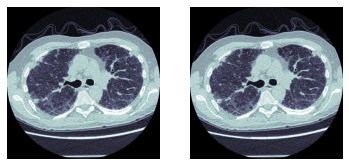

In [33]:
_,axs = subplots(1,2)
dcom.show(ax=axs[0]);   dcom.show(dicom_windows.lungs, ax=axs[1])

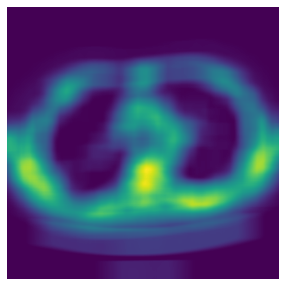

In [34]:
gdcm = gauss_blur2d(dcom.windowed(*dicom_windows.brain), 100) # using the brain for visualization purposes
show_image(gdcm);

Now take the segment from the blurr image


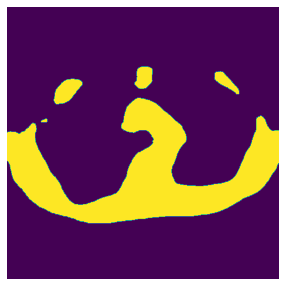

In [35]:
show_image(gdcm>0.3);

Now converting the diccom file to dataframe

In [36]:
df = pd.DataFrame.from_dicoms(fn.ls())
df.head()

,SpecificCharacterSet,ImageType,SOPInstanceUID,Modality,Manufacturer,ManufacturerModelName,PatientName,PatientID,PatientSex,DeidentificationMethod,BodyPartExamined,SliceThickness,KVP,DistanceSourceToDetector,DistanceSourceToPatient,GantryDetectorTilt,TableHeight,RotationDirection,XRayTubeCurrent,GeneratorPower,FocalSpots,ConvolutionKernel,PatientPosition,StudyInstanceUID,SeriesInstanceUID,StudyID,InstanceNumber,ImagePositionPatient,ImageOrientationPatient,FrameOfReferenceUID,PositionReferenceIndicator,SliceLocation,SamplesPerPixel,PhotometricInterpretation,Rows,Columns,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,PixelPaddingValue,WindowCenter,WindowWidth,RescaleIntercept,RescaleSlope,RescaleType,fname,MultiImageType,ImageType1,ImageType2,MultiImagePositionPatient,ImagePositionPatient1,ImagePositionPatient2,MultiImageOrientationPatient,ImageOrientationPatient1,ImageOrientationPatient2,ImageOrientationPatient3,ImageOrientationPatient4,ImageOrientationPatient5,MultiPixelSpacing,PixelSpacing1,img_min,img_max,img_mean,img_std,img_pct_window
0,ISO_IR 100,ORIGINAL,2.25.39882939725824102543938685679546804614,CT,GE MEDICAL SYSTEMS,LightSpeed VCT,ID00007637202177411956430,ID00007637202177411956430,,Table;,Chest,1.25,120.0,949.075012,541.0,0.0,130.0,CW,79,9600,0.7,BONE,FFS,2.25.80896671862726099888461805953012988790,2.25.51769600465874599901723496946193454321,,21,-158.7,1.0,2.25.64058019325784235774105718339367403144,SN,-269.75,1,MONOCHROME2,512,512,0.652344,16,16,15,1,-2000,-500.0,-1500.0,-1024.0,1.0,HU,train/ID00007637202177411956430/21.dcm,1,PRIMARY,AXIAL,1,-153.5,-269.75,1,0.0,0.0,0.0,1.0,0.0,1,0.652344,-2000,2868,127.095284,1182.195403,0.075516
1,ISO_IR 100,ORIGINAL,2.25.116080798158038264329904205296840554047,CT,GE MEDICAL SYSTEMS,LightSpeed VCT,ID00007637202177411956430,ID00007637202177411956430,,Table;,Chest,1.25,120.0,949.075012,541.0,0.0,130.0,CW,79,9600,0.7,BONE,FFS,2.25.80896671862726099888461805953012988790,2.25.51769600465874599901723496946193454321,,13,-158.7,1.0,2.25.64058019325784235774105718339367403144,SN,-189.75,1,MONOCHROME2,512,512,0.652344,16,16,15,1,-2000,-500.0,-1500.0,-1024.0,1.0,HU,train/ID00007637202177411956430/13.dcm,1,PRIMARY,AXIAL,1,-153.5,-189.75,1,0.0,0.0,0.0,1.0,0.0,1,0.652344,-2000,2815,34.862141,1146.865109,0.069645
2,ISO_IR 100,ORIGINAL,2.25.44607281621532404380672943174305504798,CT,GE MEDICAL SYSTEMS,LightSpeed VCT,ID00007637202177411956430,ID00007637202177411956430,,Table;,Chest,1.25,120.0,949.075012,541.0,0.0,130.0,CW,79,9600,0.7,BONE,FFS,2.25.80896671862726099888461805953012988790,2.25.51769600465874599901723496946193454321,,24,-158.7,1.0,2.25.64058019325784235774105718339367403144,SN,-299.75,1,MONOCHROME2,512,512,0.652344,16,16,15,1,-2000,-500.0,-1500.0,-1024.0,1.0,HU,train/ID00007637202177411956430/24.dcm,1,PRIMARY,AXIAL,1,-153.5,-299.75,1,0.0,0.0,0.0,1.0,0.0,1,0.652344,-2000,3056,184.421406,1208.678333,0.073711
3,ISO_IR 100,ORIGINAL,2.25.74976105291477552179553674617744855830,CT,GE MEDICAL SYSTEMS,LightSpeed VCT,ID00007637202177411956430,ID00007637202177411956430,,Table;,Chest,1.25,120.0,949.075012,541.0,0.0,130.0,CW,79,9600,0.7,BONE,FFS,2.25.80896671862726099888461805953012988790,2.25.51769600465874599901723496946193454321,,20,-158.7,1.0,2.25.64058019325784235774105718339367403144,SN,-259.75,1,MONOCHROME2,512,512,0.652344,16,16,15,1,-2000,-500.0,-1500.0,-1024.0,1.0,HU,train/ID00007637202177411956430/20.dcm,1,PRIMARY,AXIAL,1,-153.5,-259.75,1,0.0,0.0,0.0,1.0,0.0,1,0.652344,-2000,2926,109.478535,1174.014672,0.077923
4,ISO_IR 100,ORIGINAL,2.25.25881604343955708749088278534768316755,CT,GE MEDICAL SYSTEMS,LightSpeed VCT,ID00007637202177411956430,ID00007637202177411956430,,Table;,Chest,1.25,120.0,949.075012,541.0,0.0,130.0,CW,79,9600,0.7,BONE,FFS,2.25.80896671862726099888461805953012988790,2.25.51769600465874599901723496946193454321,,19,-158.7,1.0,2.25.64058019325784235774105718339367403144,SN,-249.75,1,MONOCHROME2,512,512,0.652344,16,16,15,1,-2000,-500.0,-1500.0,-1024.0,1.0,HU